<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#importing-Data-&amp;-Libraries" data-toc-modified-id="importing-Data-&amp;-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>importing Data &amp; Libraries</a></span></li><li><span><a href="#Cleaning-Data" data-toc-modified-id="Cleaning-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning Data</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-Null-values-in-Data" data-toc-modified-id="Dealing-with-Null-values-in-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dealing with Null values in Data</a></span></li><li><span><a href="#Dealing-with-Missing-values-in-Data" data-toc-modified-id="Dealing-with-Missing-values-in-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dealing with Missing values in Data</a></span><ul class="toc-item"><li><span><a href="#ServiceArea(Categorical)" data-toc-modified-id="ServiceArea(Categorical)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>ServiceArea(Categorical)</a></span></li><li><span><a href="#Age(Numerical)" data-toc-modified-id="Age(Numerical)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Age(Numerical)</a></span></li><li><span><a href="#HandsetPrice" data-toc-modified-id="HandsetPrice-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>HandsetPrice</a></span></li></ul></li><li><span><a href="#Changing-the-Numerical-ordinal-to-Catrgorical-ordinal" data-toc-modified-id="Changing-the-Numerical-ordinal-to-Catrgorical-ordinal-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Changing the Numerical ordinal to Catrgorical ordinal</a></span><ul class="toc-item"><li><span><a href="#CreditRating" data-toc-modified-id="CreditRating-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>CreditRating</a></span></li></ul></li><li><span><a href="#Removing-multicollinearity" data-toc-modified-id="Removing-multicollinearity-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Removing multicollinearity</a></span></li><li><span><a href="#removing-Outliers" data-toc-modified-id="removing-Outliers-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>removing Outliers</a></span></li></ul></li></ul></div>

# importing Data & Libraries

In [783]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score,mean_squared_error
from sklearn.metrics import mean_squared_error,r2_score

In [784]:
data=pd.read_csv('Data.csv')
data

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3378298,No,-6.17,0.0,-6.0,0.00,0.0,0.0,0.0,6.2,...,0,6,No,0,Unknown,No,7-Lowest,Suburban,Other,No
1,3265738,No,-5.86,0.0,-5.0,0.00,0.0,0.0,0.0,5.9,...,0,6,No,0,Unknown,No,3-Good,Suburban,Other,Yes
2,3210322,No,-2.52,211.0,0.0,0.33,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,3-Good,Suburban,Other,Unknown
3,3096670,Yes,0.00,2.0,0.0,0.00,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
4,3103410,Yes,0.00,55.0,0.0,0.00,0.0,0.0,NaN,NaN,...,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399910,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,0,30,No,1-Highest,Suburban,Other,Unknown
51043,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


# Cleaning Data

## Dealing with Null values in Data


In [785]:
data.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [786]:
# dealing with null values in MonthlyRevenue, it has 156 we delete all Na
data = data[data['MonthlyRevenue'].isna()==False]

In [787]:
# delaing with Null values in PercChangeMinutes , They are not much so we delete them
data = data[data['PercChangeMinutes'].isna()==False]

In [788]:
# delaing with Null values in Service Area, They are not much so we delete them
data = data[data['ServiceArea'].isna()==False]

In [789]:
#For AgeHH1 and AgHH2 both them reperesnet of age so we Delete one of them and we delete null valuyes as well
data=data.drop('AgeHH2', axis=1)

In [790]:
# Drop Na and also change the name of Column
data = data[data['AgeHH1'].isna()==False]
data = data.rename(columns={'AgeHH1':'Age'})

In [791]:
# we have only one null value in Handsets ,HandsetModels , CurrentEquipmentDays , so we delet them as well
data = data[data['Handsets'].isna()==False]

In [792]:
# Make sure there in no Null Values in Data
data.isna().sum()
data.shape

(49752, 57)

## Dealing with Missing values in Data

In [793]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 50890
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  object 
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  flo

In [794]:
# check the values of data if we have missing values(not null somthing that are not correct or unknown)


### ServiceArea(Categorical)

In [795]:
data.ServiceArea.value_counts()
# service area dosent have any missindg values

California              6926
Texas                   6827
New York                5055
Florida                 3699
Illinois                2031
Ohio                    1908
Virginia                1633
New Jersey              1496
Michigan                1451
Georgia                 1438
Maryland                1247
Massachusetts           1185
North Carolina          1145
Missouri                1117
Pennsylvania            1081
Washington               837
Connecticut              825
Minnesota                801
Tennessee                788
Arizona                  779
Colorado                 716
Indiana                  692
Kansas                   630
Wisconsin                626
Nevada                   503
Kentucky                 438
Louisiana                384
Oklahoma                 369
South Carolina           348
District of Columbia     335
Oregon                   288
Nebraska                 279
Iowa                     269
Hawaii                   252
New Hampshire 

### Age(Numerical)



In [796]:
data.Age.value_counts()
# we have 13808 value with 0 which is missing value so we need to
#complete missing values because the number is so high


0.0     13808
46.0     2136
42.0     2056
50.0     2051
48.0     2035
44.0     2019
40.0     1965
38.0     1951
52.0     1950
36.0     1875
30.0     1866
32.0     1816
34.0     1812
54.0     1705
28.0     1642
26.0     1384
56.0     1372
58.0     1229
24.0      853
60.0      804
22.0      535
62.0      476
64.0      399
66.0      303
68.0      277
20.0      255
70.0      246
72.0      224
74.0      165
76.0      137
78.0      102
80.0       81
82.0       54
84.0       44
18.0       44
86.0       29
88.0       23
90.0       12
94.0        7
92.0        6
98.0        2
96.0        1
99.0        1
Name: Age, dtype: int64

In [797]:
# Becuse we have lots of 0 in data we dont want to change the value of them so we change 0 value with 0.0001
# to just calculate missging value for Age 0
data['Age'] = data['Age'].replace(0,0.0001)
numerical=data.select_dtypes(['int64', 'float64'])
numerical=numerical.drop('CustomerID' ,axis=1)
numerical.shape

(49752, 33)

In [798]:
cols_backup = numerical.columns
imputer=KNNImputer(missing_values=0.0001, n_neighbors=5, weights='uniform')
imputed_data = imputer.fit_transform(numerical)
numerical= pd.DataFrame(data=imputed_data, columns=cols_backup)

In [799]:
# Repalcing Data of age with imputer data
data.loc[data.index.isin(numerical.index),'Age'] = numerical.Age

In [800]:
data[data['Age']==0.0001]['Age'].value_counts()

0.0001    364
Name: Age, dtype: int64

In [801]:
# we still have some missing values(364) in age becuse KNN could computed more so we detele them form dataframe
data = data[data['Age']!=0.0001]
data[['Age','CustomerID']].sort_values(by='Age')
data.shape

(49388, 57)

### HandsetPrice

In [802]:
# we have 28150 Unkonwn value so we can use KNNImputer for completeing this part of data
data.HandsetPrice.value_counts()
# this field should be numercial but becuase we have unknown in values so this feature is obejct
# we need to change that in order to input numericla value
# repalce Unkonwn with value which is not in data like 100000, so we are going to predict values for those one
data['HandsetPrice'] = data['HandsetPrice'].replace("Unknown",100000)
data['HandsetPrice'] = data['HandsetPrice'].astype('int64')
data[['HandsetPrice','CustomerID']].sort_values(by='HandsetPrice' ,ascending=False)
numerical=data.select_dtypes(['int64', 'float64'])
numerical=numerical.drop('CustomerID' ,axis=1)

In [803]:
cols_backup = numerical.columns
imputer=KNNImputer(missing_values=100000, n_neighbors=5, weights='uniform')
imputed_data = imputer.fit_transform(numerical)
numerical= pd.DataFrame(data=imputed_data, columns=cols_backup)

In [804]:
numerical.shape

(49388, 34)

In [805]:
numerical[['HandsetPrice']].sort_values(by='HandsetPrice',ascending=False)

,HandsetPrice
46693,500.0
47494,500.0
33697,500.0
43936,500.0
45392,500.0
...,...
47484,10.0
29729,10.0
9410,10.0
40379,10.0


In [806]:
# Repalcing Data of HandsetPrice with imputer data
data.loc[data.index.isin(numerical.index),'HandsetPrice'] = numerical.HandsetPrice
data.shape

(49388, 57)

In [807]:
data[data['HandsetPrice']==100000].shape

(312, 57)

In [808]:
# we still have 312 row which KNN couldn't replace values so we delete them
data[['HandsetPrice','CustomerID']].sort_values(by='HandsetPrice',ascending=False)
data=data[data['HandsetPrice']!=100000]
# based on data of this column, the mod 10 of all values were 0 so we need to change these new value of missing data to obay the currnt rule
data['HandsetPrice'].apply(np.ceil)
data['HandsetPrice']=data['HandsetPrice']+np.mod(data['HandsetPrice'],10)
data[['CustomerID','HandsetPrice']]

,CustomerID,HandsetPrice
0,3378298,104.0
1,3265738,78.0
5,3334666,32.0
6,3391282,32.0
7,3391442,32.0
...,...,...
50873,3002606,10.0
50879,3196882,100.0
50881,3162914,80.0
50882,3300310,100.0


## Changing the Numerical ordinal to Catrgorical ordinal

In [809]:
data['CreditRating'].value_counts()

2-High       18472
1-Highest     8323
3-Good        8093
5-Low         6178
4-Medium      5145
7-Lowest      2002
6-VeryLow      863
Name: CreditRating, dtype: int64

### CreditRating

In [810]:
# creditRating Could be Numercial Ordinal so we can make it Numercical
def creditrating(x):
    if x =="7-Lowest":
        return 1
    elif x =="6-VeryLow":
        return 2
    elif x =="5-Low":
        return 3
    elif x =="4-Medium":
        return 4
    elif x =="3-Good":
        return 5
    elif x =="2-High":
        return 6
    elif x =="1-Highest":
        return 7
    else:
        return x   
data['CreditRating']=data['CreditRating'].apply(creditrating)
data['CreditRating'].value_counts()

6    18472
7     8323
5     8093
3     6178
4     5145
1     2002
2      863
Name: CreditRating, dtype: int64

In [843]:
# Handsets ,HandsetModels,RetentionCall,RetentionOffersAccepted,ReferralsMadeBySubscriber are ordinal
categorical=data.select_dtypes(['object'])
numerical=data.select_dtypes(['int64','float64'])
numerical=numerical.drop('CustomerID',axis=1)

categorical=pd.concat([categorical,data[['Handsets',
                                         'HandsetModels',
                                         'RetentionCalls',
                                         'RetentionOffersAccepted',
                                         'ReferralsMadeBySubscriber',
                                         'AdjustmentsToCreditRating',
                                         'CreditRating' ]]], axis=1)
numerical=numerical.drop(numerical[['Handsets',
                                         'HandsetModels',
                                         'RetentionCalls',
                                         'RetentionOffersAccepted',
                                         'ReferralsMadeBySubscriber',
                                         'AdjustmentsToCreditRating',
                                         'CreditRating']], axis=1)

In [844]:
num_backup=numerical
cat_backup=categorical

In [826]:
numerical=num_backup
categorical=cat_backup

In [845]:
numerical.shape

(49076, 28)

In [846]:
categorical=data.select_dtypes(['object'])
categorical.shape

(49076, 21)

In [840]:
categorical.info()
numerical.info()
numerical.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49076 entries, 0 to 50887
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Churn                    49076 non-null  object
 1   ServiceArea              49076 non-null  object
 2   ChildrenInHH             49076 non-null  object
 3   HandsetRefurbished       49076 non-null  object
 4   HandsetWebCapable        49076 non-null  object
 5   TruckOwner               49076 non-null  object
 6   RVOwner                  49076 non-null  object
 7   Homeownership            49076 non-null  object
 8   BuysViaMailOrder         49076 non-null  object
 9   RespondsToMailOffers     49076 non-null  object
 10  OptOutMailings           49076 non-null  object
 11  NonUSTravel              49076 non-null  object
 12  OwnsComputer             49076 non-null  object
 13  HasCreditCard            49076 non-null  object
 14  NewCellphoneUser         49076 non-nul

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,49076.0,56.257527,37.477090,-6.17,33.4575,47.70,69.260,855.50
MonthlyMinutes,49076.0,506.764284,497.687538,0.00,156.0000,360.00,698.000,6336.00
TotalRecurringCharge,49076.0,46.301879,22.846621,-6.00,30.0000,45.00,60.000,342.00
DirectorAssistedCalls,49076.0,0.843443,1.943184,0.00,0.0000,0.25,0.740,72.77
OverageMinutes,49076.0,34.795705,78.961689,0.00,0.0000,2.00,38.000,4321.00
RoamingCalls,49076.0,1.051632,6.392971,0.00,0.0000,0.00,0.200,692.40
PercChangeMinutes,49076.0,-10.863334,242.923162,-3875.00,-82.0000,-5.00,64.000,4480.00
PercChangeRevenues,49076.0,-1.095957,32.573379,-571.10,-6.7000,-0.30,1.500,868.20
DroppedCalls,49076.0,5.828358,8.691028,0.00,0.7000,3.00,7.300,221.70
BlockedCalls,49076.0,3.963756,10.543137,0.00,0.0000,1.00,3.700,324.70


## Removing multicollinearity

In [849]:
# load statmodels functions
col = numerical.columns
considered_features = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'CurrentEquipmentDays', 'Age', 'IncomeGroup', 'HandsetPrice']
# compute the vif for all given features
def compute_vif(considered_features):
    
    X = data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)
# the VIF of DroppedBlockedCalls is 283 so we remove it
# compute vif values after removing a feature
considered_features.remove('DroppedBlockedCalls')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)
# the VIF of MonthlyRevenue is 10.106 so we remove it
# compute vif values after removing a feature
considered_features.remove('MonthlyRevenue')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)
# the VIF of MonthlyMintes is 5.76 so we remove it
considered_features.remove('MonthlyMinutes')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)
numerical=numerical.drop(['DroppedBlockedCalls','MonthlyRevenue','MonthlyMinutes'],axis=1)

/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_81640/2539111567.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


In [822]:
numerical.shape

(49076, 27)

In [850]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49076 entries, 0 to 50887
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalRecurringCharge   49076 non-null  float64
 1   DirectorAssistedCalls  49076 non-null  float64
 2   OverageMinutes         49076 non-null  float64
 3   RoamingCalls           49076 non-null  float64
 4   PercChangeMinutes      49076 non-null  float64
 5   PercChangeRevenues     49076 non-null  float64
 6   DroppedCalls           49076 non-null  float64
 7   BlockedCalls           49076 non-null  float64
 8   UnansweredCalls        49076 non-null  float64
 9   CustomerCareCalls      49076 non-null  float64
 10  ThreewayCalls          49076 non-null  float64
 11  ReceivedCalls          49076 non-null  float64
 12  OutboundCalls          49076 non-null  float64
 13  InboundCalls           49076 non-null  float64
 14  PeakCallsInOut         49076 non-null  float64
 15  Of

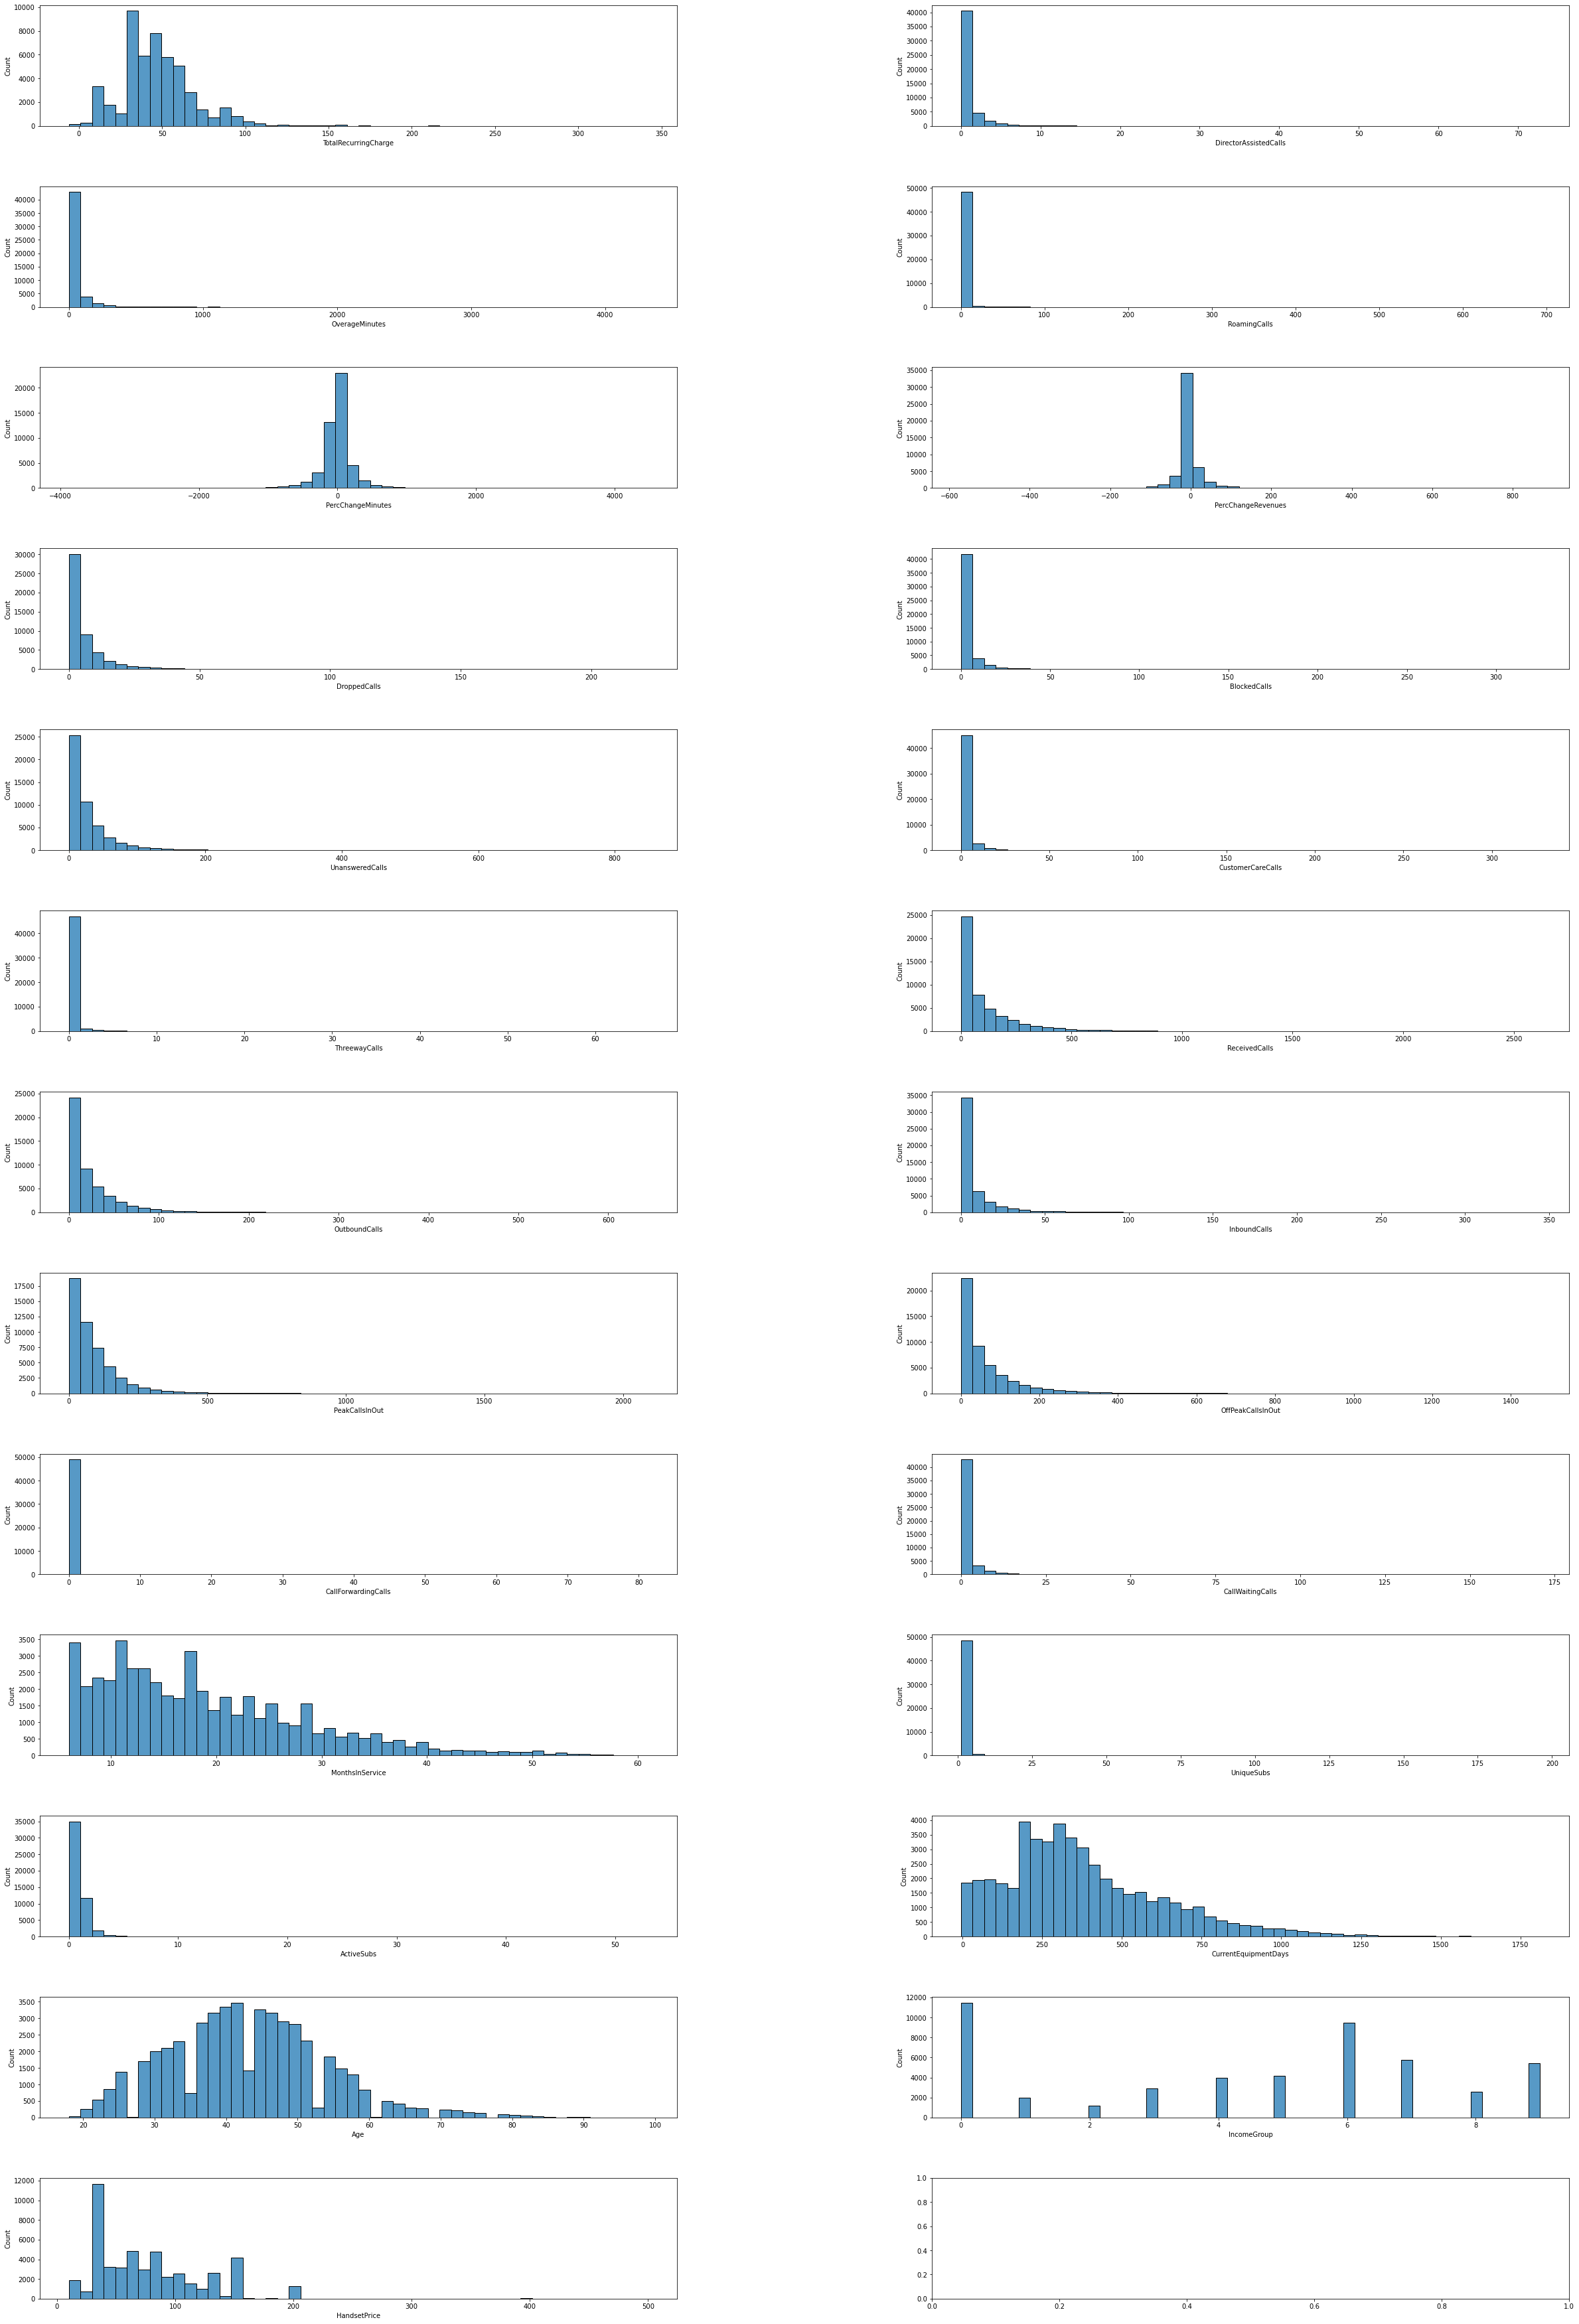

In [851]:
def plot_num(df):
    col=list(df.columns)
    fig,ax=plt.subplots(int(np.ceil(len(col)/2)),2 ,figsize=(40,60))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    j=0
    k=0
    for i in range(len(col)):
        sns.histplot(x =df[col[i]], data = df, ax=ax[j,k],bins = 50)
        k=k+1
        if k>=2:
            j=j+1
            k=0
            
plot_num(numerical)

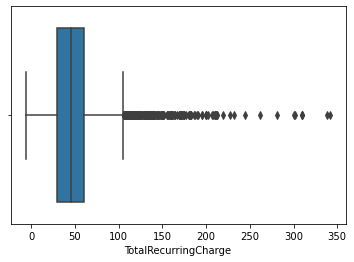

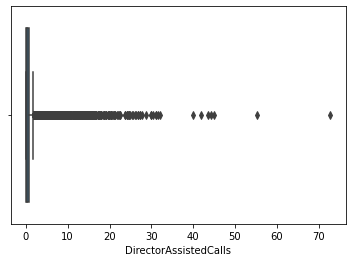

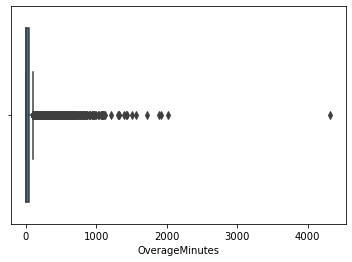

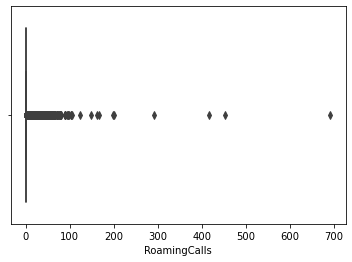

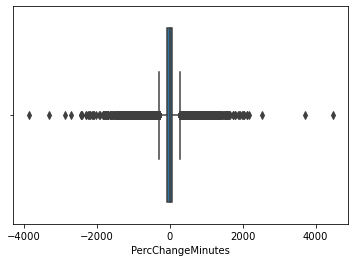

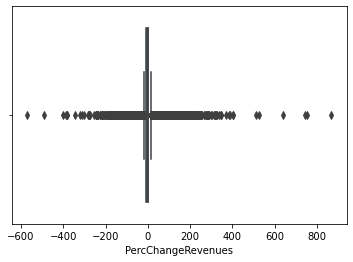

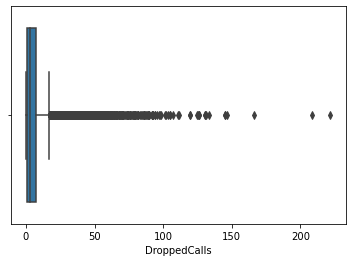

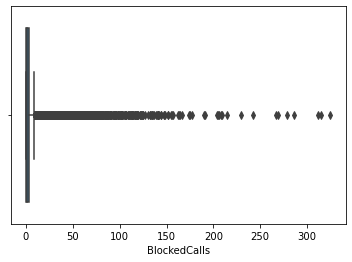

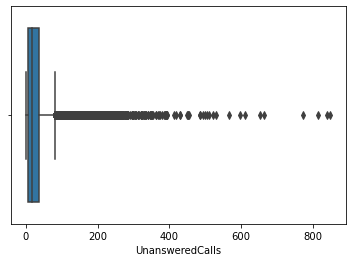

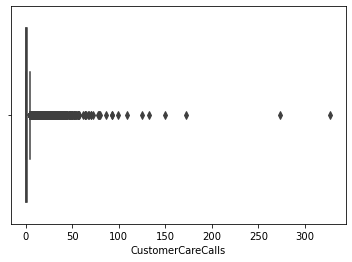

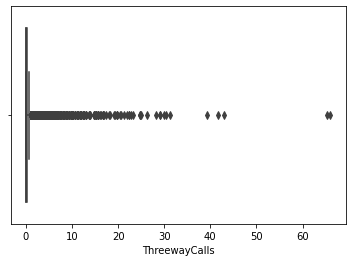

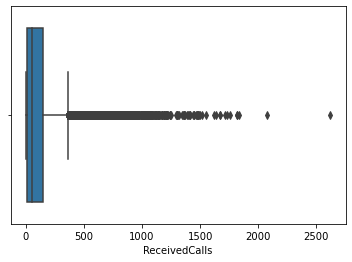

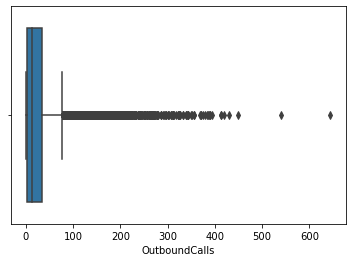

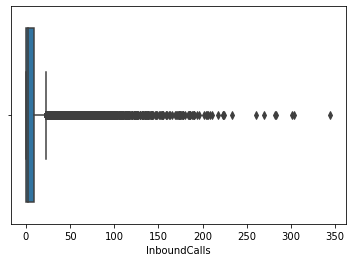

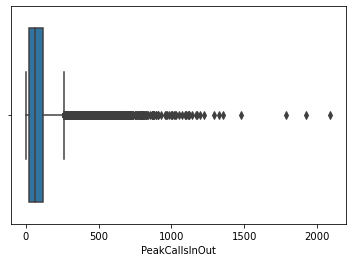

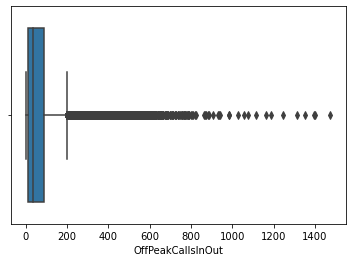

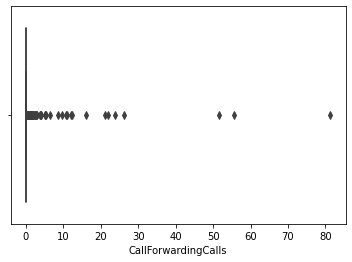

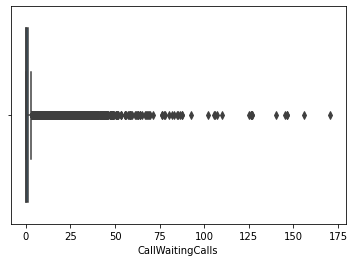

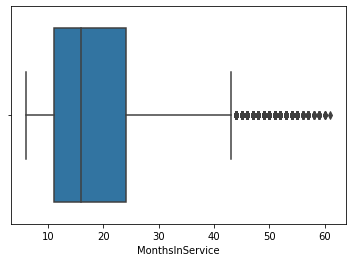

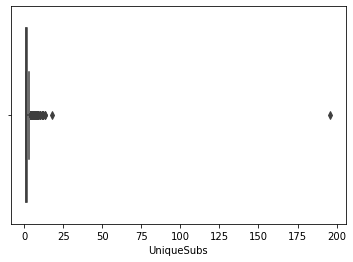

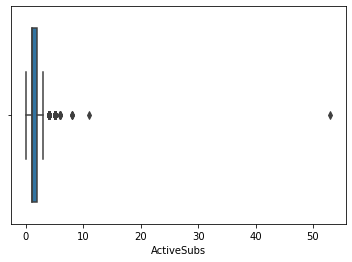

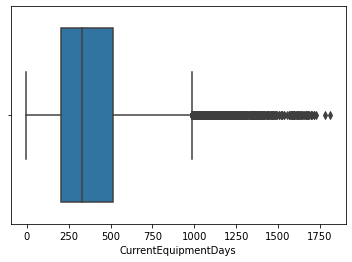

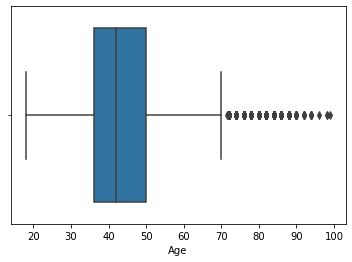

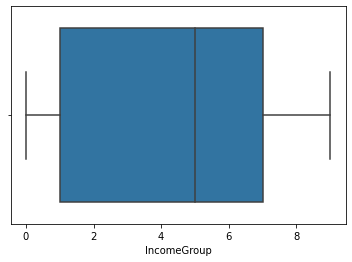

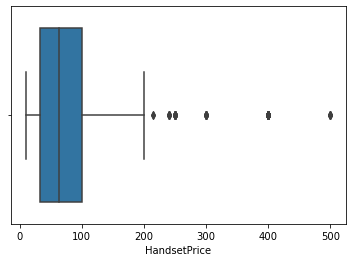

In [852]:
def plot_num(df):
    col=list(df.columns)
    for i in range(len(col)):
        sns.boxplot(x =df[col[i]], data = df) 
        plt.show()
plot_num(numerical)

## removing Outliers

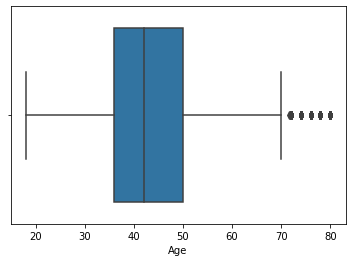

(48891, 25)

In [866]:
# Age
#For age we weill remove agell people grater that 80 it seems not corrcet
numerical[numerical['Age']>80]['Age'].value_counts()
numerical=numerical[numerical['Age']<=80]
sns.boxplot(x =numerical['Age'], data = numerical) 
plt.show()
numerical.shape

Series([], Name: TotalRecurringCharge, dtype: int64)


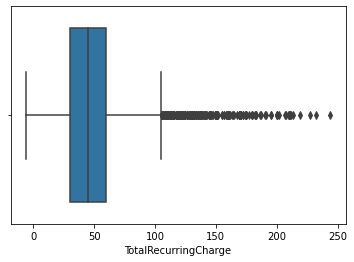

(48891, 25)

In [867]:
#'TotalRecurringCharge'
print(numerical[numerical['TotalRecurringCharge']>250]['TotalRecurringCharge'].value_counts())
numerical=numerical[numerical['TotalRecurringCharge']<=250]
sns.boxplot(x =numerical['TotalRecurringCharge'], data = numerical) 
plt.show()
numerical.shape

4321.0    1
Name: OverageMinutes, dtype: int64


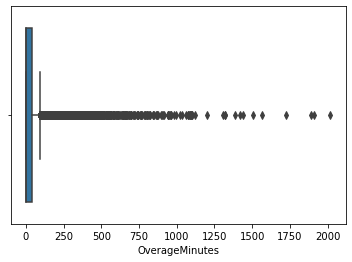

(48890, 25)

In [868]:
#OverageMinutes
print(numerical[numerical['OverageMinutes']>3000]['OverageMinutes'].value_counts())
numerical=numerical[numerical['OverageMinutes']<=3000]
sns.boxplot(x =numerical['OverageMinutes'], data = numerical) 
plt.show()
numerical.shape

105.1    1
103.5    1
102.6    1
122.9    1
161.4    1
147.2    1
199.0    1
292.5    1
451.9    1
416.3    1
201.2    1
165.9    1
692.4    1
Name: RoamingCalls, dtype: int64


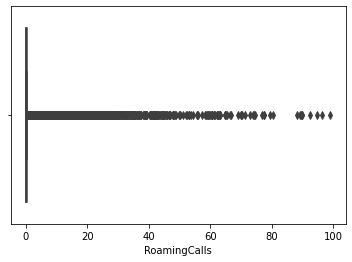

(48877, 25)

In [873]:
#RoamingCalls 
print(numerical[numerical['RoamingCalls']>100]['RoamingCalls'].value_counts())
numerical=numerical[numerical['RoamingCalls']<=100]
sns.boxplot(x =numerical['RoamingCalls'], data = numerical) 
plt.show()
numerical.shape

-3875.0    1
-3331.0    1
 4480.0    1
 3712.0    1
Name: PercChangeMinutes, dtype: int64


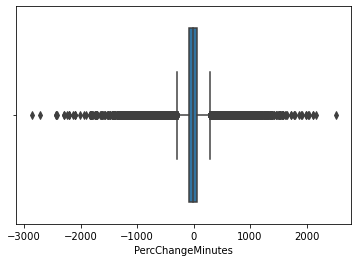

(48873, 25)

In [878]:
#PercChangeMinutes
print(numerical[(numerical['PercChangeMinutes']>3000)|(numerical['PercChangeMinutes']<-3000)
               ]['PercChangeMinutes'].value_counts())
numerical=numerical[(numerical['PercChangeMinutes']<3000)&(numerical['PercChangeMinutes']>-3000)]
sns.boxplot(x =numerical['PercChangeMinutes'], data = numerical) 
plt.show()
numerical.shape

527.4    1
404.7    1
509.7    1
638.6    1
402.1    1
741.1    1
Name: PercChangeRevenues, dtype: int64


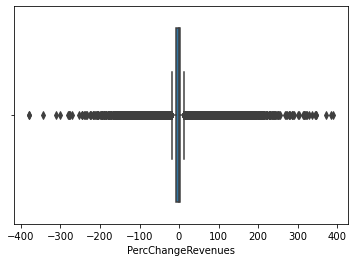

(48867, 25)

In [884]:
#PercChangeRevenues
print(numerical[numerical['PercChangeRevenues']>400]['PercChangeRevenues'].value_counts())
numerical=numerical[numerical['PercChangeRevenues']<=400]
sns.boxplot(x =numerical['PercChangeRevenues'], data = numerical) 
plt.show()
numerical.shape

208.7    1
166.3    1
221.7    1
Name: DroppedCalls, dtype: int64


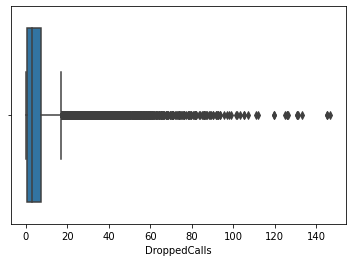

(48864, 25)

In [887]:
#DroppedCalls 
print(numerical[numerical['DroppedCalls']>150]['DroppedCalls'].value_counts())
numerical=numerical[numerical['DroppedCalls']<=150]
sns.boxplot(x =numerical['DroppedCalls'], data = numerical) 
plt.show()
numerical.shape

286.3    1
311.3    1
266.3    1
314.7    1
268.7    1
278.7    1
Name: BlockedCalls, dtype: int64


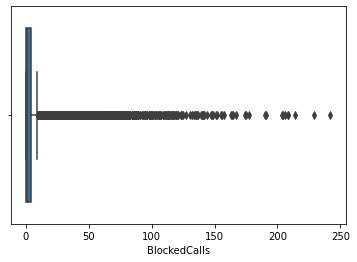

(48858, 25)

In [890]:
#BlockedCalls
print(numerical[numerical['BlockedCalls']>250]['BlockedCalls'].value_counts())
numerical=numerical[numerical['BlockedCalls']<=250]
sns.boxplot(x =numerical['BlockedCalls'], data = numerical) 
plt.show()
numerical.shape

597.3    1
771.3    1
840.0    1
565.0    1
653.7    1
610.3    1
663.3    1
848.7    1
814.3    1
Name: UnansweredCalls, dtype: int64


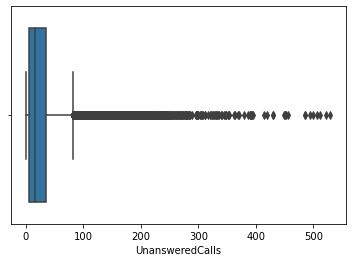

(48849, 25)

In [894]:
#UnansweredCalls
print(numerical[numerical['UnansweredCalls']>550]['UnansweredCalls'].value_counts())
numerical=numerical[numerical['UnansweredCalls']<=550]
sns.boxplot(x =numerical['UnansweredCalls'], data = numerical) 
plt.show()
numerical.shape

150.0    1
124.3    1
108.3    1
132.3    1
Name: CustomerCareCalls, dtype: int64


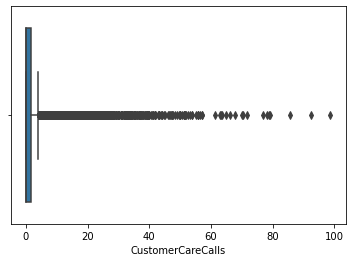

(48842, 25)

In [899]:
#CustomerCareCalls
print(numerical[numerical['CustomerCareCalls']>100]['CustomerCareCalls'].value_counts())
numerical=numerical[numerical['CustomerCareCalls']<=100]
sns.boxplot(x =numerical['CustomerCareCalls'], data = numerical) 
plt.show()
numerical.shape

43.0    1
39.3    1
41.7    1
Name: ThreewayCalls, dtype: int64


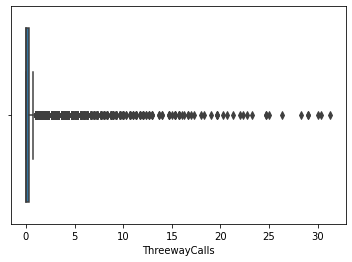

(48839, 25)

In [902]:
#ThreewayCalls 
print(numerical[numerical['ThreewayCalls']>35]['ThreewayCalls'].value_counts())
numerical=numerical[numerical['ThreewayCalls']<=35]
sns.boxplot(x =numerical['ThreewayCalls'], data = numerical) 
plt.show()
numerical.shape

2619.3    1
2075.9    1
Name: ReceivedCalls, dtype: int64


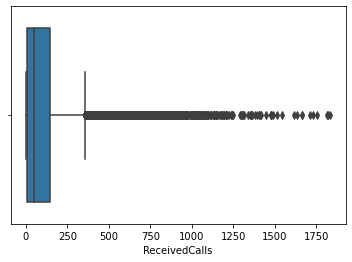

(48837, 25)

In [905]:
#ReceivedCalls
print(numerical[numerical['ReceivedCalls']>2000]['ReceivedCalls'].value_counts())
numerical=numerical[numerical['ReceivedCalls']<=2000]
sns.boxplot(x =numerical['ReceivedCalls'], data = numerical) 
plt.show()
numerical.shape

413.3    1
540.7    1
429.7    1
448.7    1
418.3    1
413.7    1
Name: OutboundCalls, dtype: int64


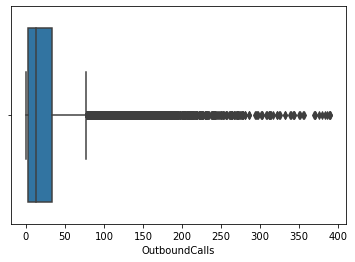

(48831, 25)

In [908]:
#OutboundCalls
print(numerical[numerical['OutboundCalls']>400]['OutboundCalls'].value_counts())
numerical=numerical[numerical['OutboundCalls']<=400]
sns.boxplot(x =numerical['OutboundCalls'], data = numerical) 
plt.show()
numerical.shape

301.0    1
283.7    1
260.7    1
304.0    1
281.7    1
Name: InboundCalls, dtype: int64


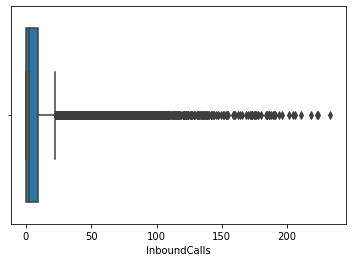

(48826, 25)

In [911]:
#InboundCalls
print(numerical[numerical['InboundCalls']>250]['InboundCalls'].value_counts())
numerical=numerical[numerical['InboundCalls']<=250]
sns.boxplot(x =numerical['InboundCalls'], data = numerical) 
plt.show()
numerical.shape

1292.0    1
1784.7    1
1355.7    1
Name: PeakCallsInOut, dtype: int64


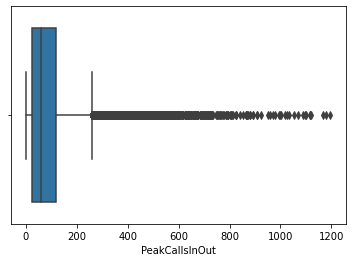

(48823, 25)

In [916]:
#PeakCallsInOut
print(numerical[numerical['PeakCallsInOut']>1250]['PeakCallsInOut'].value_counts())
numerical=numerical[numerical['PeakCallsInOut']<=1250]
sns.boxplot(x =numerical['PeakCallsInOut'], data = numerical) 
plt.show()
numerical.shape

1161.0    1
1115.3    1
1474.7    1
1058.0    1
1313.7    1
1395.3    1
1245.0    1
1076.0    1
Name: OffPeakCallsInOut, dtype: int64


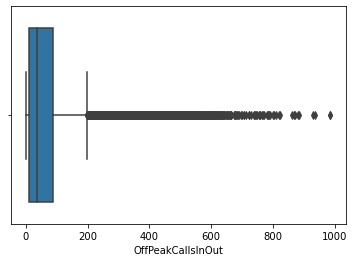

(48815, 25)

In [919]:
#OffPeakCallsInOut
print(numerical[numerical['OffPeakCallsInOut']>1000]['OffPeakCallsInOut'].value_counts())
numerical=numerical[numerical['OffPeakCallsInOut']<=1000]
sns.boxplot(x =numerical['OffPeakCallsInOut'], data = numerical) 
plt.show()
numerical.shape

In [853]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49076 entries, 0 to 50887
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalRecurringCharge   49076 non-null  float64
 1   DirectorAssistedCalls  49076 non-null  float64
 2   OverageMinutes         49076 non-null  float64
 3   RoamingCalls           49076 non-null  float64
 4   PercChangeMinutes      49076 non-null  float64
 5   PercChangeRevenues     49076 non-null  float64
 6   DroppedCalls           49076 non-null  float64
 7   BlockedCalls           49076 non-null  float64
 8   UnansweredCalls        49076 non-null  float64
 9   CustomerCareCalls      49076 non-null  float64
 10  ThreewayCalls          49076 non-null  float64
 11  ReceivedCalls          49076 non-null  float64
 12  OutboundCalls          49076 non-null  float64
 13  InboundCalls           49076 non-null  float64
 14  PeakCallsInOut         49076 non-null  float64
 15  Of

In [ ]:
#BlockedCalls


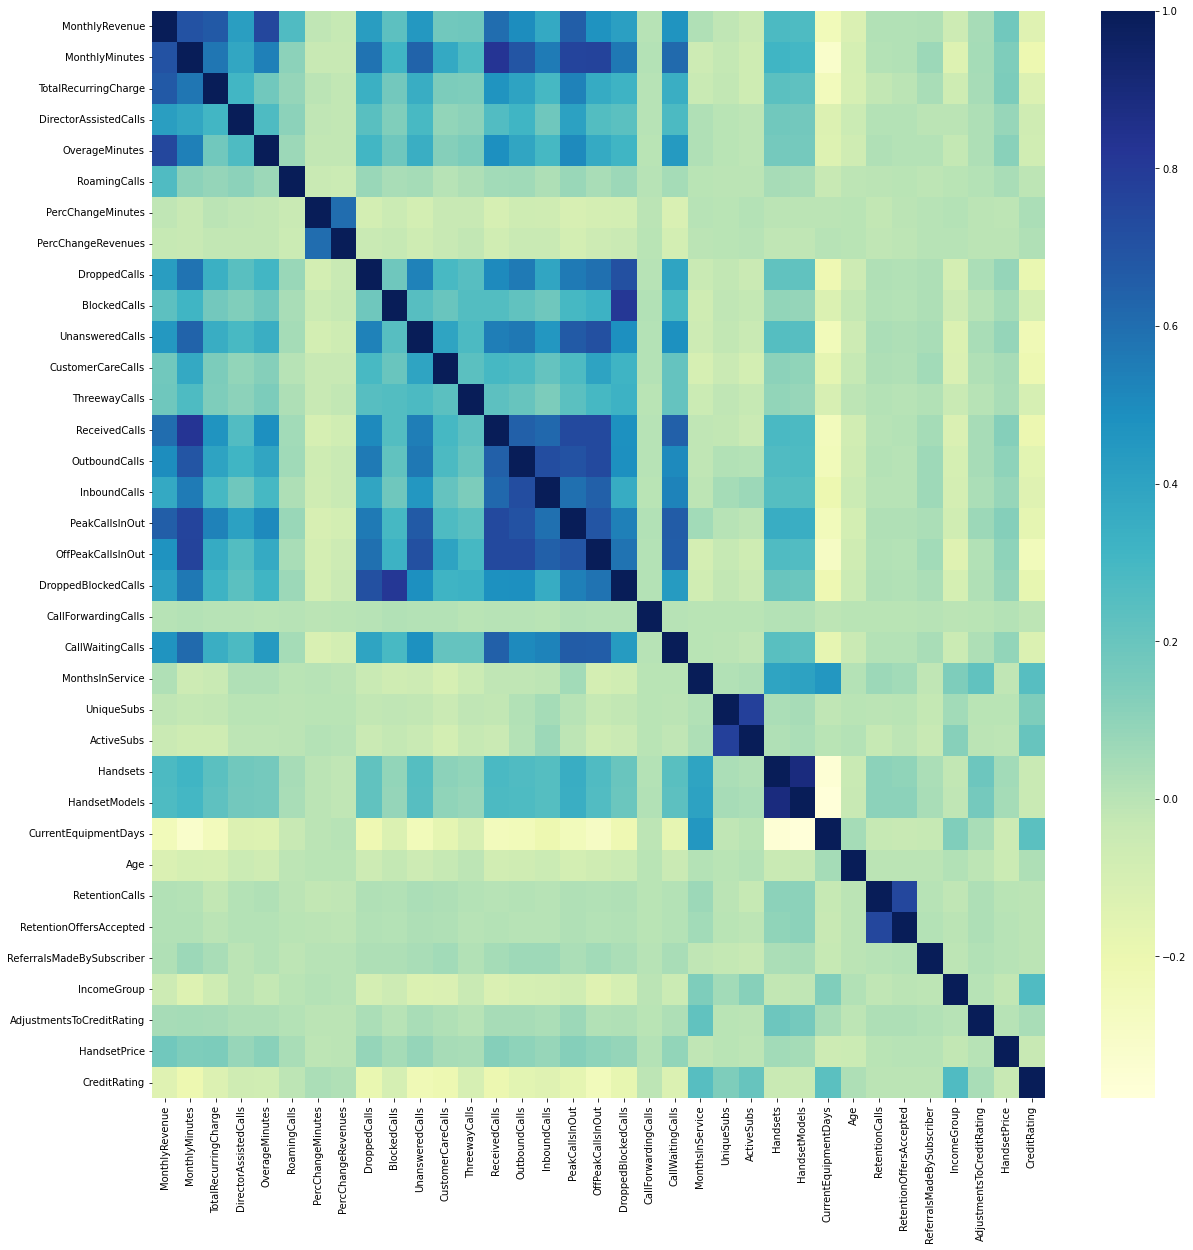

In [575]:
corr_matrix=numerical.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix ,cmap="YlGnBu") #annot=True,

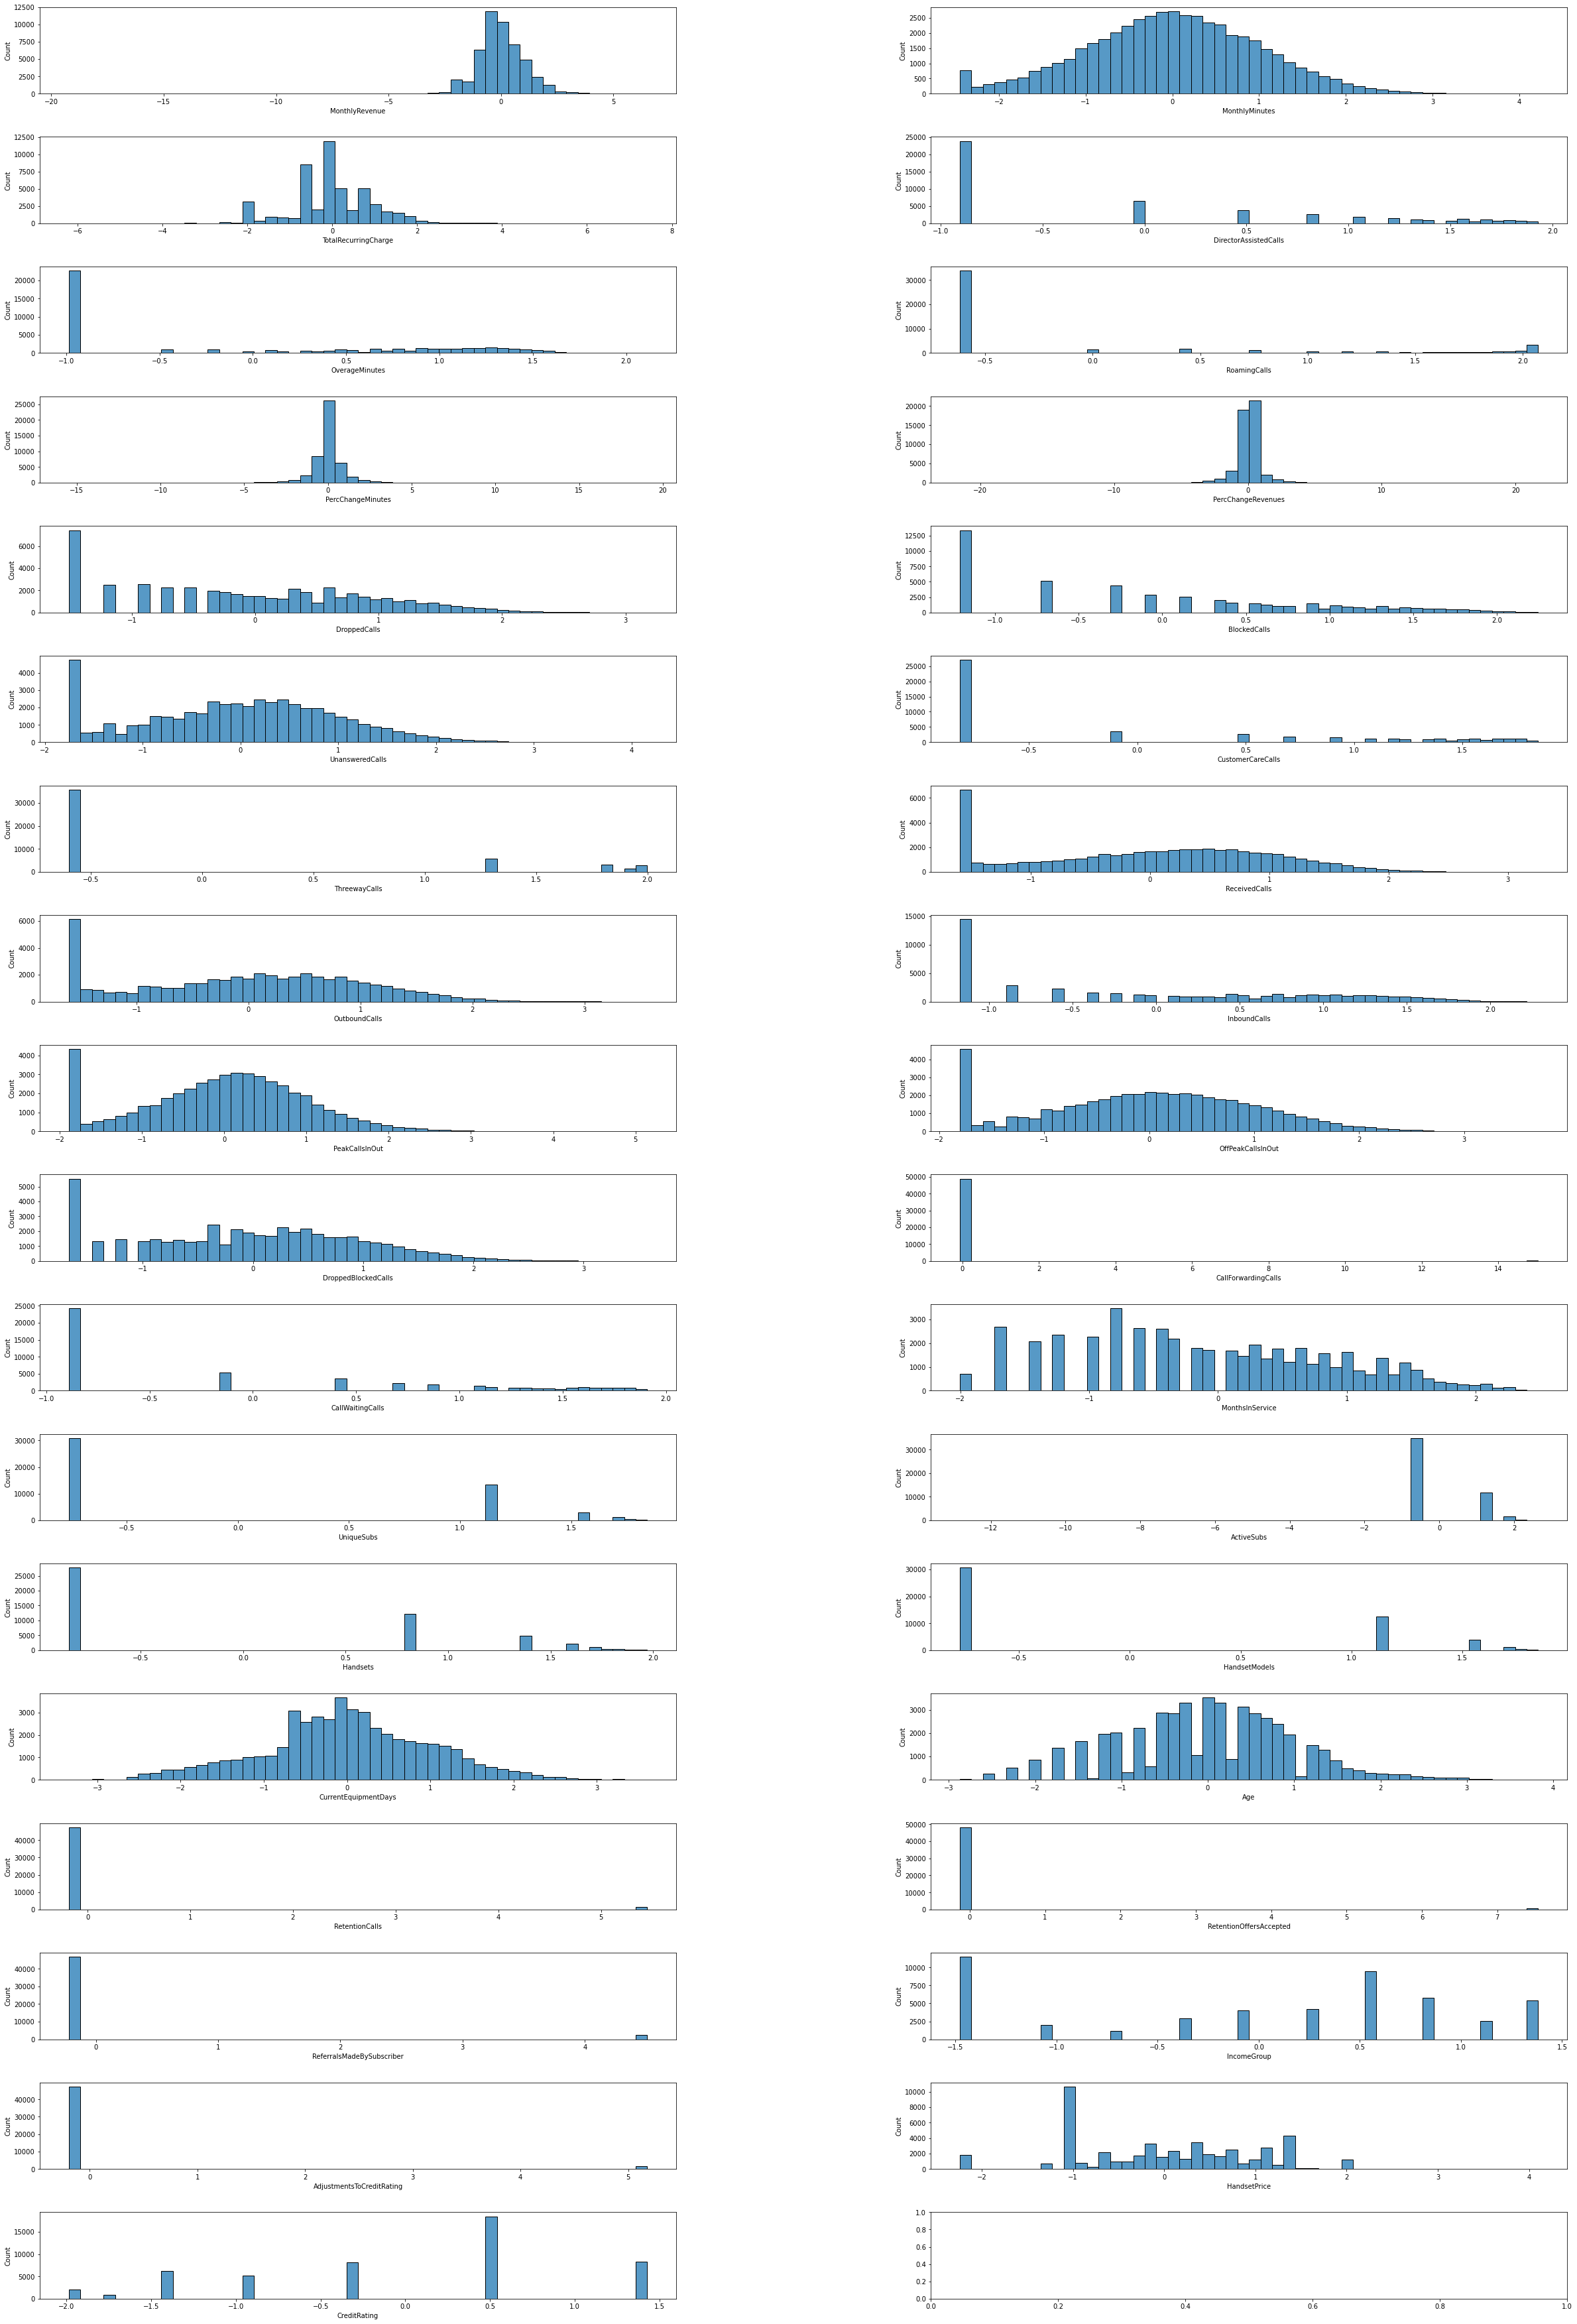

In [576]:
transformer = PowerTransformer()
transformer.fit(numerical)
X_train_scaled_total = transformer.transform(numerical)
X_train_scaled = pd.DataFrame(X_train_scaled_total, columns=numerical.columns)
plot_num(X_train_scaled)

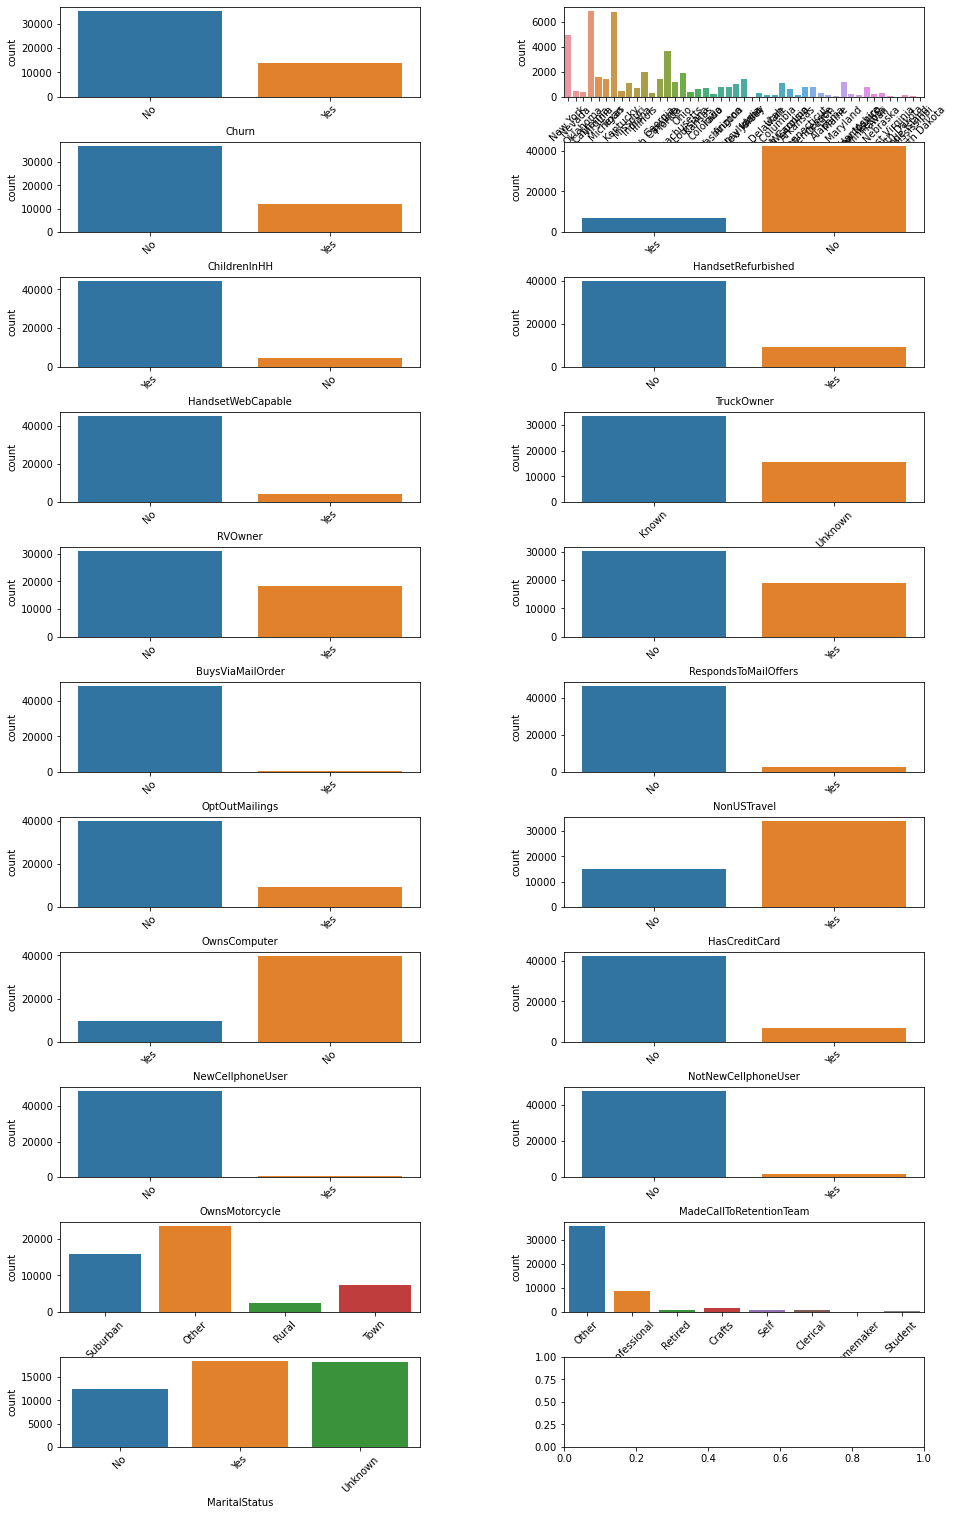

In [603]:
def plot_cat(df):
    col=list(df.columns)
    fig,ax=plt.subplots(int(np.ceil(len(col)/2)),2 ,figsize=(15,25))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    j=0
    k=0
    for i in range(len(col)):
        chart=sns.countplot(x=df[col[i]],data=df,ax=ax[j,k])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        k=k+1
        if k>=2:
            j=j+1
            k=0
plot_cat(categorical)

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,PrizmCode,Occupation,MaritalStatus
0,No,New York,No,Yes,Yes,No,No,Known,No,No,...,No,No,No,Yes,No,No,No,Suburban,Other,No
1,No,Nevada,No,No,Yes,No,No,Known,No,No,...,No,No,No,No,No,No,No,Suburban,Other,Yes
5,No,Oklahoma,No,No,Yes,No,No,Unknown,No,No,...,No,No,No,No,Yes,No,No,Other,Other,Unknown
6,No,California,No,No,No,No,No,Known,No,No,...,No,No,Yes,No,No,No,No,Suburban,Other,Yes
7,No,California,No,No,No,No,No,Known,No,No,...,No,No,No,No,No,No,No,Other,Other,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50873,No,Pennsylvania,Yes,No,Yes,No,No,Known,Yes,Yes,...,No,Yes,Yes,Yes,No,No,No,Suburban,Clerical,Yes
50879,Yes,Texas,No,No,Yes,No,No,Known,No,No,...,No,No,Yes,No,No,No,No,Suburban,Other,No
50881,No,Indiana,No,Yes,Yes,No,No,Unknown,No,No,...,No,No,No,No,Yes,No,Yes,Other,Other,No
50882,No,Texas,Yes,No,Yes,Yes,No,Known,Yes,Yes,...,No,No,Yes,No,No,No,No,Other,Professional,Yes


In [533]:
transformer = PowerTransformer()
transformer.fit(numerical)
X_train_scaled_total = transformer.transform(numerical)
X_train_scaled = pd.DataFrame(X_train_scaled_total, columns=numerical.columns)
plot_num(X_train_scaled)

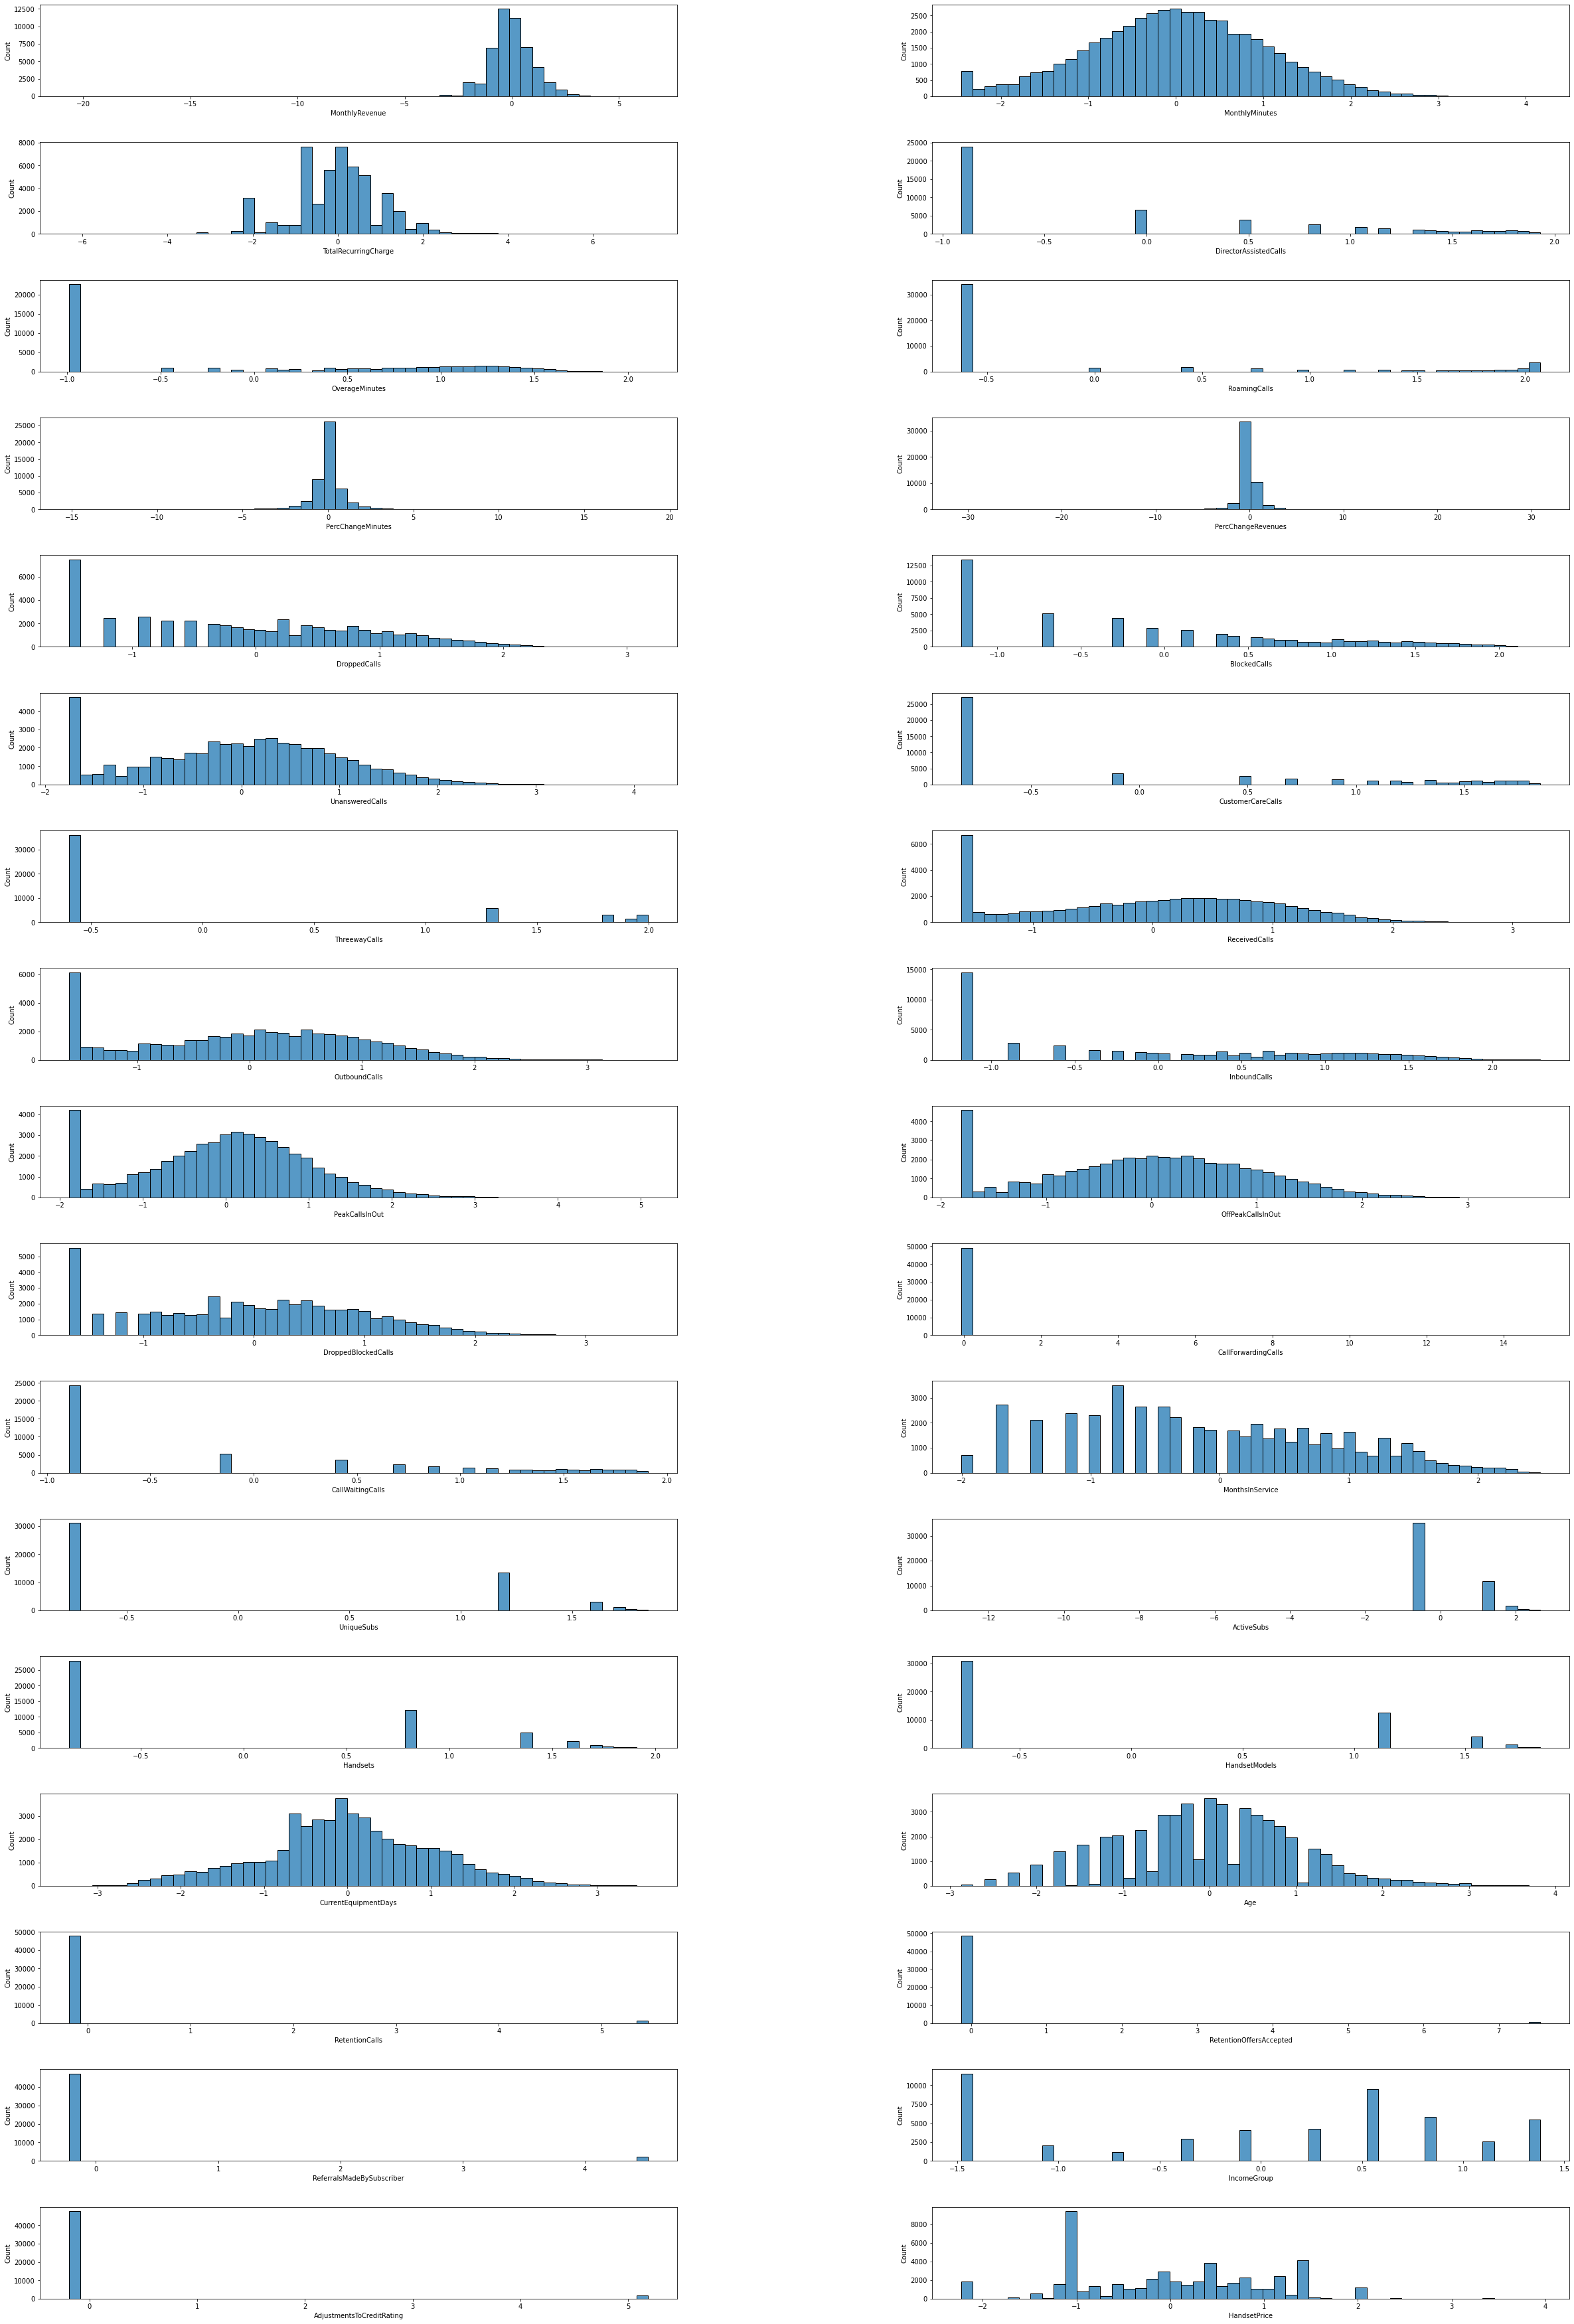

In [611]:
X=pd.concat([categorical,numerical], axis=1) 
Y=X['Churn']
X=X.drop('Churn',axis=1)


In [612]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [613]:
#split numericals and categoricals

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = 'object')
X_test_cat  = X_test_df.select_dtypes(include = 'object')

In [639]:
# Normalizing
def normal(name,X_train,y_train,X_test,y_test):
    
    while ( name not in ['MinMaxScaler','PowerTransformer','StandardScaler']):
        value = input("Incorrect transformer name, please enter a valid one: [1:'MinMaxScaler',2:'PowerTransformer',3:'StandardScaler']")
        if ( value == '1'):
            name = "MinMaxScaler"
        elif ( value == '2'):
            name = "PowerTransformer"
        elif ( value == "3"):
            name = "StandardScaler"
        else:
            name = None
            
    #X_train_df = pd.DataFrame(X_train, columns=X.columns)
    #X_test_df  = pd.DataFrame(X_test,  columns=X.columns)
    X_train_num = X_train_df.select_dtypes(include = np.number)
    X_test_num  = X_test_df.select_dtypes(include = np.number)
    X_train_cat = X_train_df.select_dtypes(include = 'object')
    X_test_cat  = X_test_df.select_dtypes(include = 'object')
    
    encoder = OneHotEncoder(drop='first')
    encoder.fit(X_train_cat)
    
    X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
    cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
    X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols, index = X_train_cat.index)
    X_train_encoded = pd.concat([X_train_encoded_df,X_train_num], axis=1)
    
    X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
    X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded,columns=cols, index = X_test_cat.index)
    X_test_encoded = pd.concat([X_test_cat_encoded_df,X_test_num], axis=1)
        
    if name=="MinMaxScaler":
        transformer = MinMaxScaler()
        transformer.fit(X_train_encoded)
    elif name=="PowerTransformer":
        transformer = PowerTransformer()
        transformer.fit(X_train_encoded)
    elif name=='StandardScaler':
        transformer = StandardScaler()
        transformer.fit(X_train_encoded)
        
    X_train_scaled_total = transformer.transform(X_train_encoded)
    X_train_scaled_total_df = pd.DataFrame(X_train_scaled_total, columns = X_train_encoded.columns)
    X_test_scaled_total  = transformer.transform(X_test_encoded)
    X_test_scaled_total_df = pd.DataFrame(X_test_scaled_total, columns= X_test_encoded.columns)
    
    return X_train_scaled_total_df, X_test_scaled_total_df

In [641]:
tested, tested2 = normal("PowerTransformer",X_train,y_train,X_test,y_test)
tested2.head()

,ServiceArea_Arizona,ServiceArea_Arkansas,ServiceArea_California,ServiceArea_Colorado,ServiceArea_Connecticut,ServiceArea_Delaware,ServiceArea_District of Columbia,ServiceArea_Florida,ServiceArea_Georgia,ServiceArea_Hawaii,...,HandsetModels,CurrentEquipmentDays,Age,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,CreditRating
0,-0.126359,-0.053965,-0.401961,-0.120619,-0.130458,-0.052277,-0.081333,3.510274,-0.172385,-0.069736,...,1.123046,-1.693110,-1.989203,-0.184321,-0.13296,-0.224389,0.540882,-0.193151,0.630966,1.428712
1,-0.126359,-0.053965,-0.401961,-0.120619,7.665277,-0.052277,-0.081333,-0.284878,-0.172385,-0.069736,...,-0.766089,0.289640,-0.123848,-0.184321,-0.13296,-0.224389,0.540882,-0.193151,-1.067236,-0.909567
2,-0.126359,-0.053965,-0.401961,-0.120619,-0.130458,-0.052277,-0.081333,-0.284878,5.800980,-0.069736,...,-0.766089,1.266368,-0.011939,-0.184321,-0.13296,-0.224389,-0.061036,-0.193151,1.431693,1.428712
3,-0.126359,-0.053965,-0.401961,-0.120619,-0.130458,-0.052277,-0.081333,-0.284878,-0.172385,-0.069736,...,-0.766089,-0.197749,0.846981,-0.184321,-0.13296,-0.224389,0.245123,-0.193151,-1.067236,-0.279853
4,-0.126359,-0.053965,-0.401961,-0.120619,-0.130458,-0.052277,-0.081333,-0.284878,-0.172385,-0.069736,...,-0.766089,1.414987,0.024892,-0.184321,-0.13296,-0.224389,1.381289,-0.193151,-0.564737,0.497539


In [ ]:
del tested, tested2